# Problem 2

Consider the following SCARA manipulator.
![SCARA Diagram](images/scara_manipulator.png)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

### (a) Workspace Volume

*Assumptions:* We are assuming that the range of both joints $\theta_1$ and $\theta_2$ is $[0, 2\pi]$ radians. The length of the arms connected at the end of each joint are $l_1 = 60$ cm and $l_2 = 40$ cm. The end effector $d$ has an unknown stated range that we will maintain as $d$ for the calculation of the workspace volume of the SCARA-type manipulator.

*Solution:* Because the range of both joints is $[0, 2\pi]$ radians, the workspace volume created is effectively the difference in area between two circles where the radii of the larger and smaller circles are $l_1 + l_2$ and $l_1 - l_2$ respectively multiplied by the value of $d$.

$$
\begin{align*}
	V &= [\pi \cdot (l_1 + l_2)^2 - \pi \cdot (l_1 - l_2)^2] \cdot d \\
	V &= \pi d ((l_1 + l_2)^2 - (l_1 - l_2)^2)
\end{align*}
$$

In [3]:
def calc_workspace(len1, len2):
    return math.pi * ((len1 + len2)**2 - (len1 - len2)**2)

print(f"The workspace volume for our SCARA manipulator is {calc_workspace(0.6, 0.4)} x d meters")

The workspace volume for our SCARA manipulator is 3.015928947446201 x d meters


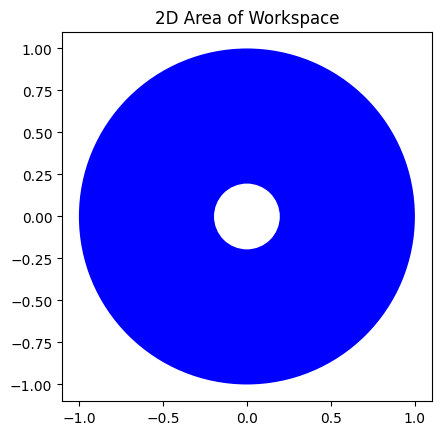

In [12]:
# Plot 2D Area of Workspace
plt.axes()

circle1 = plt.Circle((0,0),0.6 + 0.4, fc='blue')
circle2 = plt.Circle((0,0), 0.6 - 0.4, fc='white', ec='blue')

plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

plt.title('2D Area of Workspace')
plt.axis('scaled')

plt.show()

### (b) DH Parameters 

Define the DH parameters for the above SCARA manipulator.

*Assumptions:* The joint with angle $\theta_1$ is joint 1. The joint with angle $\theta_2$ is joint 2. The joint with angle $\theta_3$ is joint 3. We are assuming that joint 1 and joint 2 only rotate about the conventional normal (i.e. they are perpendicular to the conventional coordinate frame). We are assuming that the three joints exist on the same conventional horizontal plane (i.e. they exist at the plane $z = 0$).

*Solution:* The DH parameters for joint 1 are $a = l_1$, $\alpha = 0$, $d = 0$, $\theta = \theta_1$. The DH parameters for joint 2 are $a = l_2$, $\alpha = 0$, $d = 0$, $\theta = \theta_2$. The DH parameters for joint 3 are $a = 0$, $\alpha = 0$, $d = d_4$, $\theta = \theta_3$.

### (c) Calculate End Effector

Calculate the position of the end effector given the following conditions: $\theta_1 = 30 ^\circ$, $\theta_2 = 45 ^\circ$, $\theta_3 = 90 ^\circ$, and $d = 14$ cm ($0.14$ m).

*Assumptions:* Assume the position of the first motor is (0, 0, 0).

*Solution:* The rotation of $\theta_1$ and $\theta_2$ are in the xy plane. This means that the value of $d$ is the z-value of the end effector's position. Therefore, we only need to calculate the x and y positions of the end effector.

To solve this geometrically, the two joints create a triangle with two known sides with lengths $l_1$ and $l_2$. Because the value of $\theta_2$ is based on the coordinate system of that joint, the angle created between the sides $l_1$ and $l_2$ is $180 ^\circ - \theta_2$. 

![Figure 1](images/figure1.png)

From this triangle, we can use the law of cosines to calculate the length of the third side (we will call $c$).

In [6]:
def law_of_cosines(a, b, angle_C):
    return math.sqrt(a**2 + b**2 - 2 * a * b * math.cos(angle_C))

Using the value of side $c$, we can now calculate the angle between sides $c$ and $l_1$ (we will call this angle A) using the Law of Sines.

In [7]:
def law_of_sines(side1, angle1, side2):
    return math.asin((side2 * math.sin(angle1)) / side1)

Now that we have the length of side $c$ and the angle $A$, we can calculate the x and y positions of the end effector. The side $c$ creates a right triange with the x-axis, so we can use the basic trigonometric functions sine and cosine to calculate the x and y coordinates of the end effector. The x-coordinate of the end effector will be $c \cdot \cos(\theta_1 - A)$, and the y-coordinate will be $c \cdot \sin(\theta_1 - A)$.

![Figure 2](images/figure2.png)

Therefore, the position of the end effector is ($c \cdot \cos(\theta_1 - A)$, $c \cdot \sin(\theta_1 - A)$, $d$).

In [8]:
def get_position(lengths, angles, d):
    c = law_of_cosines(a=lengths[0], b=lengths[1], angle_C=180 - angles[1])
    angle_A = law_of_sines(side1=c, angle1=180 - angles[1], side2=lengths[1])
    
    return (c * math.cos(angles[0] - angle_A), c * math.sin(angles[0] - angle_A), -d)

In [9]:
lengths = (0.6, 0.4) 	# meters
angles = (math.pi / 6, math.pi / 4, math.pi / 2)	# radians
d = .14	# meters

position = get_position(lengths, angles, d)

print(f"The (x, y, z) position of the end effector is ({position[0]}, {position[1]}, {position[2]}).")

The (x, y, z) position of the end effector is (0.8337838810177515, 0.5475844632197294, -0.14).
